In [1]:
import os
os.chdir('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/')

In [2]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [ ]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_1 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_1.obs_names.name = "barcode"

print(adata_1)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_1.write_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/adata_1.h5ad")
print("→ Saved to adata.h5ad")


Matrix has 54922 cells × 30454 genes
AnnData object with n_obs × n_vars = 54922 × 30454
    var: 'gene_id', 'genome'


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [4]:
# import pandas as pd
# import gzip, shutil

# # 1) Make barcodes.tsv.gz
# meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/cell_metadata.csv", dtype=str)
# # if your barcode column is named “bc_wells”:
# barcodes = meta["bc_wells"]
# # otherwise use meta.iloc[:,0]
# barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
# with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
#     shutil.copyfileobj(src, dst)

# # 2) Make features.tsv.gz
# feat = pd.read_csv(
#     "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/all_genes.csv",
#     header=None,
#     names=["ensembl","symbol","assembly"],
#     dtype=str
# )
# feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
# with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv.gz","wb") as dst:
#     shutil.copyfileobj(src, dst)

# # 3) Gzip your matrix file
# with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
#     shutil.copyfileobj(src, dst)


In [5]:
# import scipy.io as sio
# import pandas as pd
# import anndata

# # --- 1) Read the sparse count‐matrix (.mtx) ---
# mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/count_matrix.mtx").tocsr()
# n_cells, n_genes = mtx.shape
# print(f"Matrix has {n_cells} cells × {n_genes} genes")

# # --- 2) Read your barcodes (.tsv) ---
# # assumes one barcode per line, no header
# bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
# assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
# barcodes = bc["barcode"].tolist()

# # --- 3) Read your feature list (.tsv) ---
# # assumes a header line with columns e.g. gene_id, gene_name, genome
# feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# # if your file has more rows than your matrix has genes, trim:
# if feat.shape[0] > n_genes:
#     feat = feat.iloc[:n_genes].copy()
# assert feat.shape[0] == n_genes, \
#        f"{feat.shape[0]} features != {n_genes} genes"

# # pick whichever column you want as var_names; here we use gene_name
# # keep all other columns as metadata
# var = feat.set_index("gene_name")
# var.index.name = "gene_symbol"

# # --- 4) Build AnnData ---
# adata_2 = anndata.AnnData(
#     X=mtx,
#     obs=pd.DataFrame(index=barcodes),
#     var=var
# )
# adata_2.obs_names.name = "barcode"

# print(adata_2)  # should show n_obs=… × n_vars=…

# # --- 5) Write out a single .h5ad file ---
# adata_2.write_h5ad("adata_2.h5ad")
# print("→ Saved to adata.h5ad")

In [ ]:
import scanpy as sc
adata_1 = sc.read_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/adata_1.h5ad")
# adata_2 = sc.read_h5ad("adata_2.h5ad")

/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
# # Mutate each AnnData so that its var_names are unique
# a1 = adata_1.copy()
# a2 = adata_2.copy()

# a1.var_names_make_unique()  
# a2.var_names_make_unique()

# # Now you can concat without errors
# adata = anndata.concat(
#     [a1, a2],
#     join="outer",
#     label="batch",
#     keys=["batch1","batch2"],
# )
# print(adata)


In [8]:
# print(adata)                   # Shows dimensions, annotations
# print(adata.obs.head())        # Cell-level metadata
# print(adata.var.head())        # Gene-level metadata

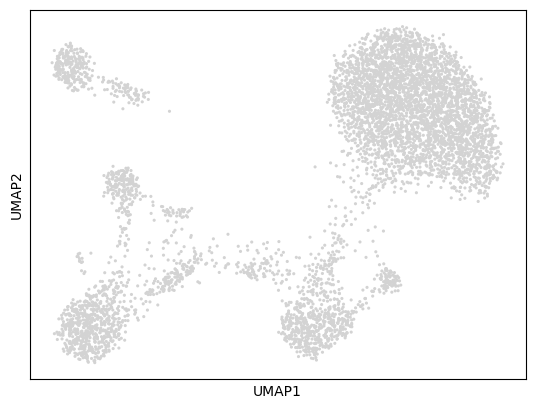

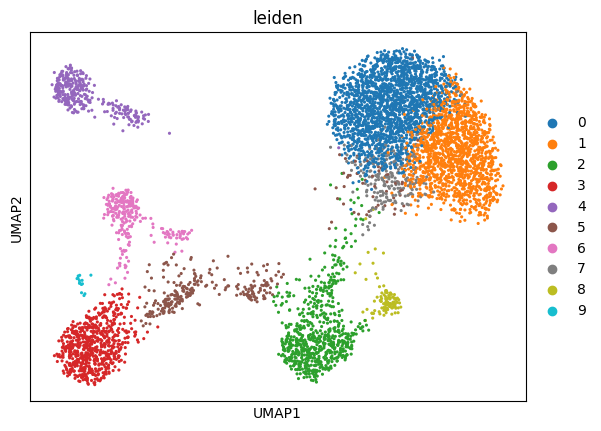

In [25]:
sc.pp.filter_cells(adata_1, min_genes=200)
sc.pp.filter_genes(adata_1, min_cells=3)

sc.pp.normalize_total(adata_1)
sc.pp.log1p(adata_1)

sc.pp.pca(adata_1)
sc.pp.neighbors(adata_1)
sc.tl.umap(adata_1)
sc.pl.umap(adata_1)
sc.tl.leiden(adata_1)
sc.pl.umap(adata_1, color=['leiden'])

In [10]:
# Read the excel file
df_markers = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')

In [11]:
# Filter for rows related to immune system
immune_df = df_markers[df_markers["tissueType"] == "Immune system"]

# # Create marker dictionary
# immune_markers = {}
# for _, row in immune_df.iterrows():
#     cell_type = row["cellName"]
#     genes_raw = str(row["geneSymbolmore1"])
#     if pd.notna(genes_raw):
#         gene_list = [gene.strip() for gene in genes_raw.split(",") if gene.strip()]
#         immune_markers[cell_type] = gene_list

# # Show a preview of the marker dictionary (first 5 entries)
# dict(list(immune_markers.items())[:5])

#Columns containing comma‑separated gene lists
gene_cols = ["geneSymbolmore1", "geneSymbolmore2"]

# Build the marker dictionary
immune_markers = {}
for _, row in immune_df.iterrows():
    cell_type = row["cellName"]
    genes = []
    for col in gene_cols:
        raw = row.get(col)
        if pd.notna(raw):
            # split, strip, and extend
            genes.extend(g.strip() for g in str(raw).split(",") if g.strip())
    # optional: dedupe while preserving order
    seen = set()
    deduped = []
    for g in genes:
        if g not in seen:
            seen.add(g)
            deduped.append(g)
    immune_markers[cell_type] = deduped

# Preview the first 5 entries
import itertools
print(dict(itertools.islice(immune_markers.items(), 5)))


{'Pro-B cells': ['CD27', 'IgD', 'CD24', 'PTPRC', 'PAX5', 'CD38', 'CD79A', 'DNTT', 'C10orf10', 'VPREB1', 'ARPP21', 'CD99', 'IGLL1', 'CD9', 'CD79B', 'TCL1A', 'IGLL5', 'HLA-DQA1', 'HLA-DQB1', 'VPREB3'], 'Pre-B cells': ['CD19', 'CD27', 'IgD', 'CD24', 'PTPRC', 'PAX5', 'CD38', 'CD79A', 'NSMCE1', 'PCDH9', 'ACSM3', 'CCDC191', 'TCL1A', 'CD79B', 'IGLL5', 'HLA-DQA1', 'HLA-DQB1', 'VPREB3'], 'Naive B cells': ['CD19', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A', 'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'], 'Memory B cells': ['CD19', 'CD27', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A', 'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'], 'Plasma B cells': ['CD27', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL

In [12]:

print("TEK" in adata_1.var_names)



False


In [13]:
adata_1.var_names = adata_1.var_names.str.upper()
print(adata_1.var_names)

Index(['ALX4', 'HEBP1', 'TMCC2', 'NUAK2', 'KIAA1614', 'XPR1', 'IDUA',
       'TMEM175', 'CD82', 'GAK',
       ...
       'LOC103693477', 'PSPN', 'ENSRNOG00000071193', 'ENSRNOG00000071198',
       'GAPDH-PS1', 'ENSRNOG00000071206', 'ENSRNOG00000071212', 'CHEK1',
       'P3H3', 'CD4'],
      dtype='object', name='gene_symbol', length=13618)


In [14]:
# Flatten all marker genes into a list
all_marker_genes = set(gene for genes in immune_markers.values() for gene in genes)

# Check how many marker genes exist in adata
matched_genes = all_marker_genes.intersection(set(adata_1.var_names))
print(f"Matched {len(matched_genes)} out of {len(all_marker_genes)} marker genes.")
print(matched_genes)

Matched 116 out of 298 marker genes.
{'MCAM', 'CD6', 'CD19', 'CD63', 'CD9', 'FCGR3A', 'ENG', 'MRC1', 'VPREB3', 'PDPN', 'S100A9', 'VWF', 'CCL3', 'CXCR2', 'FOXI1', 'ALOX15', 'SHD', 'CLEC10A', 'GNG11', 'TFRC', 'FCER1G', 'FOXP3', 'CLU', 'ZMAT4', 'CTLA4', 'MS4A1', 'LST1', 'CD3D', 'GZMA', 'PROM1', 'PAX5', 'TEK', 'CD27', 'SEC11C', 'CD40', 'ITGA4', 'BPI', 'S100A8', 'SLC18A2', 'KIT', 'PRDX4', 'ASPM', 'MSR1', 'ICAM1', 'HDC', 'OASL', 'NTM', 'ANXA3', 'CD86', 'RUVBL1', 'PPBP', 'CD80', 'CD79A', 'CST3', 'VCAN', 'CHI3L1', 'NKG7', 'CXCR4', 'GZMB', 'PECAM1', 'FLT1', 'IFIT2', 'CD33', 'DERL3', 'CCR7', 'CD3E', 'IFIT1', 'FKBP11', 'GYPA', 'JCHAIN', 'CD4', 'PF4', 'ARPP21', 'HPGDS', 'CD8B', 'RHOC', 'RSAD2', 'SIGLEC8', 'ABCG2', 'CD69', 'GATA1', 'GZMM', 'ACSM3', 'IL1B', 'CD38', 'CD79B', 'S100A4', 'IL2RA', 'CD14', 'CD68', 'NRP1', 'NSMCE1', 'ITGAX', 'MMP9', 'SELL', 'SSR4', 'PTPRC', 'GCA', 'CD3G', 'CCL4', 'CD44', 'CCDC191', 'CCR3', 'GPM6B', 'CD83', 'CD2', 'TPM2', 'CD8A', 'CD163', 'MNDA', 'IFIT3', 'IL3RA', 'EPHA2', 

In [15]:
# for cell_type, genes in immune_markers.items():
#     valid_genes = [g.upper() for g in genes if g.upper() in adata_1.var_names]
#     if valid_genes:
#         adata_1.obs[cell_type + '_score'] = adata_1[:, valid_genes].X.mean(axis=1)

# score_cols = [col for col in adata_1.obs.columns if col.endswith('_score')]
# adata_1.obs['predicted_immune_cell_type'] = adata_1.obs[score_cols].idxmax(axis=1).str.replace('_score', '')

# 0) Make sure var_names are unique
adata_1.var_names_make_unique()

# 1) Score each cell type
for cell_type, genes in immune_markers.items():
    # uppercase for matching against the now‐unique var_names
    valid_genes = [g.upper() for g in genes if g.upper() in adata_1.var_names]
    if not valid_genes:
        continue
    # get the integer column indices
    idx = [adata_1.var_names.get_loc(g) for g in valid_genes]
    # compute the mean expression across those columns for each cell
    # .X may be sparse, so convert to dense array slice
    mat = adata_1.X[:, idx]
    # if sparse, convert to array; if dense, .A won’t exist but we can skip
    try:
        arr = mat.toarray()
    except AttributeError:
        arr = mat
    scores = arr.mean(axis=1)
    adata_1.obs[f"{cell_type}_score"] = scores

# 2) Pick the max‐score cell type
score_cols = [c for c in adata_1.obs.columns if c.endswith("_score")]
adata_1.obs["predicted_immune_cell_type"] = (
    adata_1.obs[score_cols]
         .idxmax(axis=1)
         .str.replace("_score", "")
)


In [22]:
# How many cells got each label?
print(adata_1.obs['predicted_immune_cell_type'].value_counts())


predicted_immune_cell_type
Progenitor cells                                4860
Erythroid-like and erythroid precursor cells     469
Cancer cells                                     253
ISG expressing immune cells                       88
Megakaryocyte                                     72
Classical Monocytes                               29
Platelets                                         29
Pro-B cells                                       26
Intermediate monocytes                            17
Eosinophils                                       15
Myeloid Dendritic cells                           12
Neutrophils                                        9
γδ-T cells                                         7
Mast cells                                         7
HSC/MPP cells                                      5
Endothelial                                        4
Basophils                                          3
CD4+ NKT-like cells                                2
Naive B cells      

       'IGLL5', 'HLA-DQA1', 'HLA-DQB1'],
      dtype='object')
       'CD138'],
      dtype='object')
       'CD138'],
      dtype='object')
       'CD138'],
      dtype='object')
       'GNLY', 'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1', 'CD25', 'HLA-DRA',
       'CD95'],
      dtype='object')
       'CD52', 'TRBC2', 'THY1', 'DAPL1', 'CD25', 'HLA-DRA', 'CD95'],
      dtype='object')
       'CD30', 'CD45RO', 'GNLY', 'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1'],
      dtype='object')
       'CD45RO', 'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1'],
      dtype='object')
       'CD30', 'GNLY', 'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1'],
      dtype='object')
       'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1'],
      dtype='object')
       'TRDV2', 'TRGV9', 'TRGC1', 'TRAC', 'CD52', 'TRBC2', 'THY1', 'DAPL1'],
      dtype='object')
       'CD314', 'CD122', 'NKG2D', 'GNLY', 'COX6A2', 'KIR2DL4'],
      dtype='object')
       'CD122', 'NKG2D', 'COX6A2', 'KIR2DL4'],
      dtype='object')
       'NKG2D', 'GNLY

/tmp/ipykernel_10915/2963783239.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["predicted_immune_cell_type"]


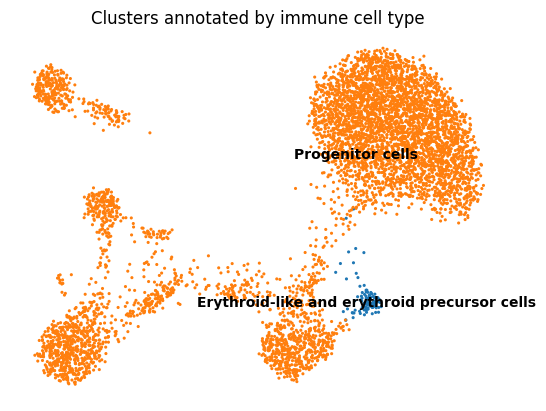

In [30]:
import scanpy as sc

# 0) Upper‑case everything so matching is case‑insensitive
adata_1.var_names = adata_1.var_names.str.upper()

# 1) Re‑build your immune_markers dict with BOTH columns, uppercased
marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
immune_markers = {}
for _, row in df_markers[df_markers["tissueType"]=="Immune system"].iterrows():
    ct = row["shortName"]
    genes = []
    for col in marker_cols:
        raw = row.get(col)
        if pd.notna(raw):
            genes += [g.strip().upper() for g in str(raw).split(",") if g.strip()]
    # dedupe
    immune_markers[ct] = list(dict.fromkeys(genes))

# 2) Use scanpy’s built‑in scoring (it will fill in zeros for any missing genes)
for cell_type, gene_list in immune_markers.items():
    # skip if no markers at all
    if not gene_list:
        continue
    sc.tl.score_genes(
        adata_1,
        gene_list,
        score_name=f"{cell_type}_score",
        use_raw=False,        # or True if you stored your un‑filtered matrix in adata.raw
    )

# 3) Collect all the *_score columns and pick the max per cell
score_cols = [c for c in adata_1.obs.columns if c.endswith("_score")]
adata_1.obs["predicted_immune_cell_type"] = (
    adata_1.obs[score_cols]
           .idxmax(axis=1)
           .str.replace("_score", "")
)

# 4) Now annotate your Leiden clusters by majority vote
sc.tl.leiden(adata_1, key_added="leiden")   # if you haven’t already
cluster_to_cell = (
    adata_1.obs
           .groupby("leiden")["predicted_immune_cell_type"]
           .agg(lambda s: s.value_counts().idxmax())
           .to_dict()
)
adata_1.obs["cluster_annotation"] = adata_1.obs["leiden"].map(cluster_to_cell)

# 5) Plot
sc.pl.umap(
    adata_1,
    color="cluster_annotation",
    legend_loc="on data",
    title="Clusters annotated by immune cell type",
    frameon=False,
    size=20,
)




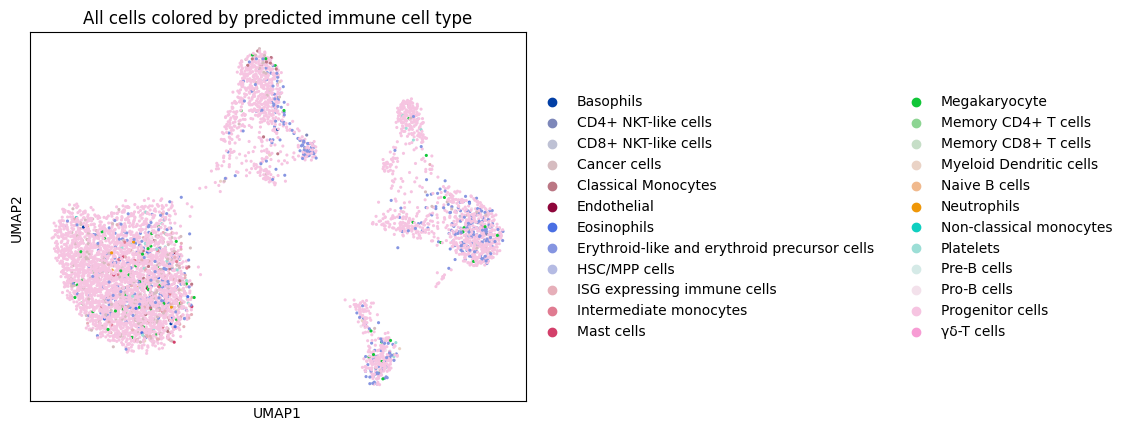

In [23]:
import scanpy as sc

sc.pl.umap(
    adata_1,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type"
)


In [31]:
import pandas as pd

# make a table of cluster × predicted type counts
ctab = pd.crosstab(
    adata_1.obs["leiden"],
    adata_1.obs["predicted_immune_cell_type"]
)

# convert to fractions per cluster
frac = ctab.div(ctab.sum(axis=1), axis=0)

# show it
display(frac)


predicted_immune_cell_type,Basophils,CD4+ NKT-like cells,CD8+ NKT-like cells,Cancer cells,Classical Monocytes,Effector CD4+ T cells,Endothelial,Eosinophils,Erythroid-like and erythroid precursor cells,Granulocytes,...,Naive CD8+ T cells,Neutrophils,Non-classical monocytes,Plasma B cells,Plasmacytoid Dendritic cells,Platelets,Pre-B cells,Pro-B cells,Progenitor cells,γδ-T cells
leiden,,,,,,,,,,,,,,,,,,,,,
0,0.006221,0.000518,0.002074,0.092794,0.008813,0.00000,0.014515,0.019181,0.124417,0.001037,...,0.00000,0.007258,0.001037,0.000000,0.000000,0.022291,0.001037,0.008813,0.584759,0.001037
1,0.002135,0.000000,0.000000,0.080427,0.003559,0.00000,0.006406,0.009964,0.089680,0.000712,...,0.00000,0.007829,0.001423,0.000712,0.000000,0.006406,0.000000,0.005694,0.733096,0.000000
2,0.004399,0.000000,0.000000,0.067449,0.027859,0.00000,0.000000,0.001466,0.231672,0.001466,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.002933,0.000000,0.001466,0.640762,0.000000
3,0.001490,0.002981,0.002981,0.034277,0.000000,0.00149,0.002981,0.001490,0.350224,0.000000,...,0.00149,0.000000,0.000000,0.000000,0.000000,0.002981,0.001490,0.007452,0.530551,0.001490
4,0.000000,0.000000,0.003096,0.009288,0.003096,0.00000,0.018576,0.000000,0.294118,0.000000,...,0.00000,0.000000,0.000000,0.003096,0.000000,0.027864,0.003096,0.061920,0.495356,0.000000
5,0.000000,0.000000,0.000000,0.016447,0.003289,0.00000,0.000000,0.003289,0.190789,0.000000,...,0.00000,0.003289,0.003289,0.000000,0.000000,0.006579,0.000000,0.003289,0.740132,0.000000
6,0.003846,0.000000,0.007692,0.019231,0.000000,0.00000,0.000000,0.007692,0.161538,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.030769,0.000000,0.019231,0.700000,0.000000
7,0.004545,0.000000,0.004545,0.059091,0.000000,0.00000,0.013636,0.013636,0.113636,0.000000,...,0.00000,0.004545,0.000000,0.000000,0.004545,0.081818,0.000000,0.009091,0.650000,0.000000
8,0.000000,0.009709,0.000000,0.038835,0.000000,0.00000,0.000000,0.000000,0.533981,0.000000,...,0.00000,0.000000,0.000000,0.009709,0.000000,0.009709,0.000000,0.000000,0.368932,0.000000


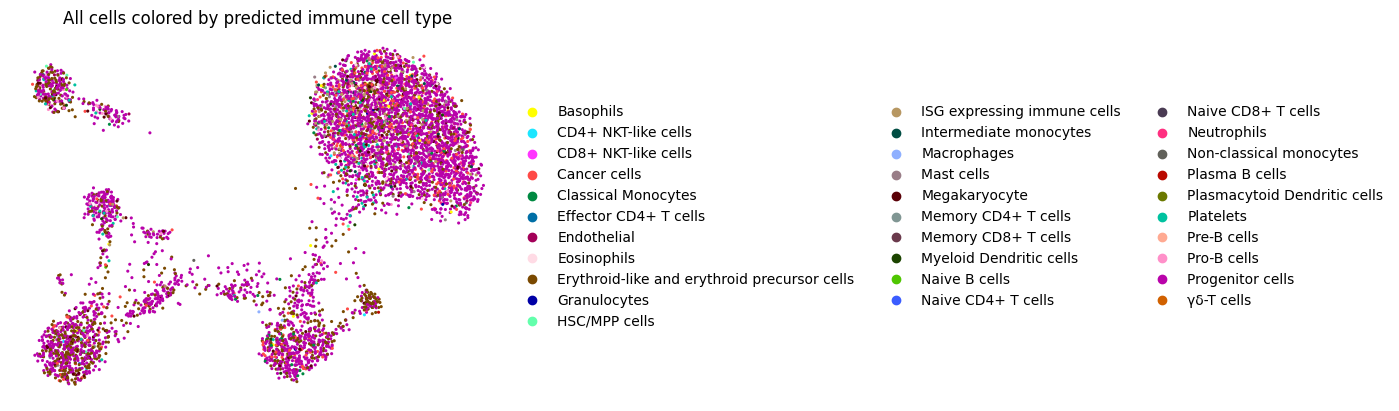

In [32]:
import scanpy as sc

sc.pl.umap(
    adata_1,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type",
    frameon=False,
    size=20
)


{'0': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '1': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '2': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '3': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '4': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '5': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '6': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '7': 'Progenitor cells & Erythroid-like and erythroid precursor cells', '8': 'Erythroid-like and erythroid precursor cells & Progenitor cells', '9': 'Progenitor cells & Erythroid-like and erythroid precursor cells'}


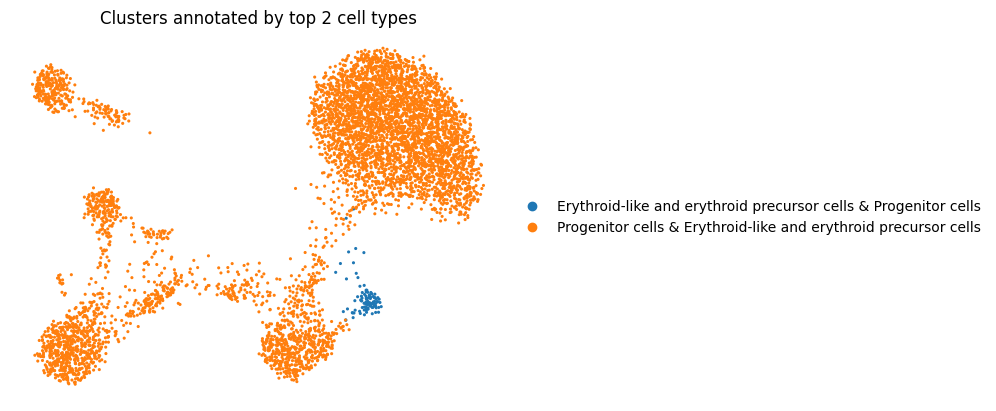

In [33]:
# find the two top cell types per cluster
top2 = (
    ctab
    .apply(lambda row: row.nlargest(2).index.tolist(), axis=1)
    .to_dict()
)

# build a “Cluster 0 → ‘TypeA & TypeB’” mapping
cluster_to_label = {
    cluster: " & ".join(cell_types)
    for cluster, cell_types in top2.items()
}

# map it back into adata.obs
adata_1.obs["cluster_annotation_top2"] = adata_1.obs["leiden"].map(cluster_to_label)

# quick check
print(cluster_to_label)

# plot
sc.pl.umap(
    adata_1,
    color="cluster_annotation_top2",
    legend_loc="right margin",
    title="Clusters annotated by top 2 cell types",
    frameon=False,
    size=20
)


In [18]:
# import re
# import pandas as pd
# import difflib

# # 1) Read your marker table
# #    adjust the path & separator if needed
# markers_df = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')
# print(markers_df.head())

# # 2) Flatten all comma‑separated columns into one set of cleaned, uppercased gene symbols
# marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
# all_markers = set()

# for col in marker_cols:
#     for val in markers_df[col].dropna():
#         # split on commas or semicolons, strip whitespace
#         genes = re.split(r"[,;]+", val)
#         for g in genes:
#             g2 = g.strip().upper()
#             if g2:
#                 all_markers.add(g2)

# print(f"Loaded {len(all_markers)} unique marker symbols from your table.")

# # 3) Uppercase your AnnData var_names for case‑insensitive matching
# adata_1.var_names = adata_1.var_names.str.upper()

# # 4) Exact matches
# obs_genes = set(adata_1.var_names)
# matched = all_markers & obs_genes
# print(f"\n✅ Exact matches: {len(matched)} / {len(all_markers)}")
# print(sorted(matched))

# # 5) If you want to see a few “near‑misses” for the unmatched ones:
# unmatched = all_markers - matched
# fuzzy = {}
# for gene in unmatched:
#     # find up to 3 close var_names, cutoff=0.8
#     close = difflib.get_close_matches(gene, adata_1.var_names, n=3, cutoff=0.8)
#     if close:
#         fuzzy[gene] = close

# print(f"\n🔍 Fuzzy matches found for {len(fuzzy)} markers:")
# for gene, hits in list(fuzzy.items())[:10]:
#     print(f"  {gene} → {hits}")

# # 6) (Optional) If you suspect human⇄rat symbol mismatches,
# #    you can use BioMart or `mygene` to convert human symbols into rat orthologs,
# #    then re–run the same matching logic on that ortholog list.


In [19]:
genesFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/all_genes.csv",header=None)
genesFile.head()

,0,1,2
0,gene_id,gene_name,genome
1,ENSRNOG00000000001,Arsj,mRatBN7-2-113
2,ENSRNOG00000000007,Gad1,mRatBN7-2-113
3,ENSRNOG00000000008,Alx4,mRatBN7-2-113
4,ENSRNOG00000000009,Tmco5b,mRatBN7-2-113


In [20]:
barcodeFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/cell_metadata.csv",header=None)
barcodeFile.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,bc_wells,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,bc3_well
1,01_01_01__s1,cees1_951,mRatBN7-2-113,47,55,72,1,1,1,A1,A1,A1
2,01_01_02__s1,cees1_951,mRatBN7-2-113,18,20,27,1,1,2,A1,A1,A2
3,01_01_03__s1,cees1_951,mRatBN7-2-113,358,493,706,1,1,3,A1,A1,A3
4,01_01_04__s1,cees1_951,mRatBN7-2-113,36,42,55,1,1,4,A1,A1,A4


In [21]:
from scipy.io import mmread

# Read the MTX file
matrix = mmread('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx')

# The result is a sparse matrix
print(matrix)

  (0, 982)	1
  (0, 1450)	1
  (0, 1521)	1
  (0, 1716)	1
  (0, 1772)	1
  (0, 1803)	1
  (0, 3744)	1
  (0, 4035)	1
  (0, 4551)	1
  (0, 4646)	1
  (0, 4894)	1
  (0, 4914)	1
  (0, 5642)	1
  (0, 5659)	1
  (0, 6631)	1
  (0, 6669)	1
  (0, 6692)	1
  (0, 7296)	1
  (0, 7539)	1
  (0, 7833)	1
  (0, 7849)	1
  (0, 7976)	1
  (0, 8422)	1
  (0, 8588)	1
  (0, 8728)	1
  :	:
  (54921, 8171)	1
  (54921, 8894)	1
  (54921, 9754)	1
  (54921, 10515)	1
  (54921, 11280)	1
  (54921, 12000)	1
  (54921, 12507)	1
  (54921, 12749)	1
  (54921, 12890)	1
  (54921, 13697)	4
  (54921, 15053)	1
  (54921, 15873)	1
  (54921, 16176)	1
  (54921, 16192)	2
  (54921, 16771)	1
  (54921, 18302)	1
  (54921, 19080)	1
  (54921, 19393)	1
  (54921, 19600)	1
  (54921, 20654)	1
  (54921, 23128)	1
  (54921, 25544)	1
  (54921, 28408)	1
  (54921, 29634)	1
  (54921, 30453)	0
